In [1]:
datapath = "../data/final"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [16]:
tissue='Lung'
import pandas as pd
from help.preprocess.loaders import feature_assemble_df
import os
df_lab = pd.read_csv(os.path.join(datapath, f'{tissue}_HELP.csv'), index_col=0).replace({'aE':'NE', 'sNE':'NE'})
print(df_lab.value_counts(normalize=False))
features = [{'fname': os.path.join(datapath, f'{tissue}_BIO.csv'), 'fixna' : False, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_CCcfs.csv'), 'fixna' : False, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_EmbN2V_128.csv'), 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_lab, features=features, subsample=True, fold=4, seed=1, saveflag=False, verbose=True) 
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

label
NE       16696
E         1235
Name: count, dtype: int64
Majority NE 16696 minoriy E 1235
Subsampling with factor 1:4
[Lung_BIO.csv] found 52507 Nan...
[Lung_BIO.csv] Normalization with std ...
[Lung_CCcfs.csv] found 6755420 Nan...
[Lung_CCcfs.csv] Normalization with std ...
[Lung_EmbN2V_128.csv] found 0 Nan...
[Lung_EmbN2V_128.csv] No normalization...
5972 labeled genes over a total of 6175
(5972, 3458) data input


,Transcript count,GC content,GTEX_lung,Gene_Disease association,OncoDB_expression,HPA_lung,GO-MF,GO-BP,GO-CC,BIOGRID,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1CF,0.047120,0.160530,6.512609e-07,NaN,0.520008,0.000000,0.069767,0.041026,0.096154,0.009589,...,0.673553,1.394478,0.040143,0.391288,-0.520452,0.065344,0.055139,0.501500,-0.632607,NE
A2M,0.062827,0.176932,1.458404e-01,0.073746,0.346661,0.073243,0.302326,0.056410,0.076923,0.049799,...,-0.883007,0.597307,0.868068,-0.450582,-0.857399,0.101487,0.358412,-0.078484,-0.339488,NE
AADAC,0.005236,0.144128,6.803914e-05,0.000000,0.315374,0.000489,0.139535,0.010256,0.019231,0.000000,...,-0.150236,0.843932,0.961256,0.531136,-0.143357,0.196230,0.364191,-0.149429,1.179155,NE
AAMP,0.047120,0.512825,4.296572e-03,NaN,0.551172,0.002406,0.023256,0.015385,0.076923,0.015466,...,0.078412,-0.648590,-0.305723,0.155255,-0.351834,-0.515158,0.099858,0.343565,1.313062,E
AARS1,0.214660,0.393300,NaN,0.002950,NaN,0.001546,0.186047,0.035897,0.076923,0.033096,...,-0.409793,0.673585,1.254751,1.066401,0.391194,0.331428,0.596007,0.281636,-0.631688,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUP1,0.015707,0.165765,NaN,NaN,0.530830,0.000268,0.046512,0.000000,0.057692,0.056913,...,0.389002,-1.006293,-0.195639,-2.534878,-1.449369,0.030845,-0.287579,-0.048886,0.438654,NE
ZWINT,0.041885,0.366428,1.554176e-04,0.000000,0.693425,0.000156,0.023256,0.020513,0.115385,0.047634,...,0.143660,-0.604624,1.394670,-0.534315,0.524747,0.348131,-0.024920,0.187029,-0.396936,NE
ZXDB,0.000000,0.339208,2.484200e-04,NaN,NaN,0.000183,0.046512,0.010256,0.000000,0.005568,...,-0.480193,0.069314,-0.186132,-0.108674,0.334988,-0.343359,0.166947,-0.402466,0.136026,NE
ZYX,0.047120,0.539522,1.821237e-02,NaN,0.474108,0.004221,0.046512,0.035897,0.153846,0.095886,...,-0.448981,-0.446795,-0.674799,0.868887,0.525818,-0.765959,0.073134,0.498463,-1.084493,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

{'E': 0, 'NE': 1}
label
NE       4748
E        1224
Name: count, dtype: int64
Classification with LightGBM...


5-fold: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


,measure
ROC-AUC,0.9579±0.0055
Accuracy,0.9156±0.0071
BA,0.8729±0.0119
Sensitivity,0.8006±0.0250
Specificity,0.9452±0.0084
MCC,0.7426±0.0206
CM,"[[980, 244], [260, 4488]]"


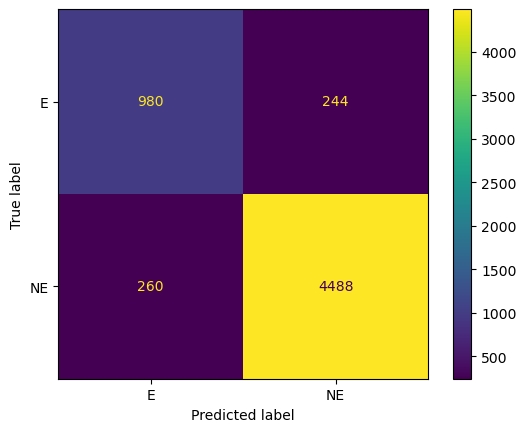

In [17]:
from help.models.prediction import predict_cv
df_scores_means, df_scores, preds = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, saveflag=True, verbose=True
                                        #outfile=os.path.join(datapath,f'pred_{tissue}_nospl.csv')
                                        )
df_scores_means

In [32]:
csEGs = pd.read_csv(os.path.join(datapath, f"csEG_{tissue}.txt"), index_col=0).index.values
print(f"TPR csEG: {len(preds.loc[preds.index.isin(list(csEGs))][preds['label'] == preds['prediction']]) / len(preds.loc[preds.index.isin(list(csEGs))])}")
preds.loc[preds.index.isin(list(csEGs))]

TPR csEG: 0.7241379310344828


/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_23125/2336485605.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"TPR csEG: {len(preds.loc[preds.index.isin(list(csEGs))][preds['label'] == preds['prediction']]) / len(preds.loc[preds.index.isin(list(csEGs))])}")


,label,prediction
gene,,
ARF4,0,0
DDX11,0,0
GEMIN7,0,0
KIF4A,0,0
METAP2,0,0
NHLRC2,0,1
PPP1CA,0,0
PPP4R2,0,0
RBM42,0,0


# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3459) data input


5-fold: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]


,measure
ROC-AUC,0.9534±0.0032
Accuracy,0.9136±0.0097
BA,0.8689±0.0213
Sensitivity,0.7930±0.0425
Specificity,0.9448±0.0060
MCC,0.7361±0.0329
CM,"[[985, 257], [265, 4536]]"


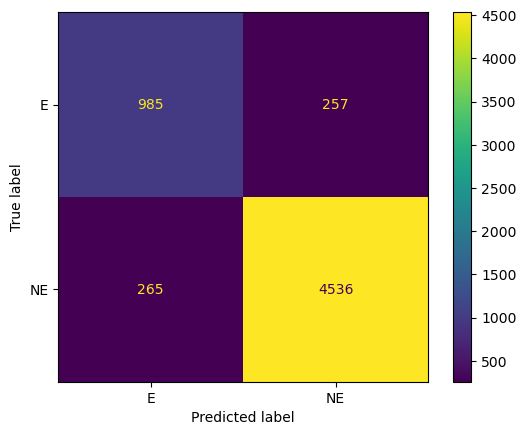

In [10]:
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, fold=4, seed=1, verbose=True)
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means